Welcome to the Quantum Coin Flip Game!
Guess the outcome of the coin flip (heads/tails): heads


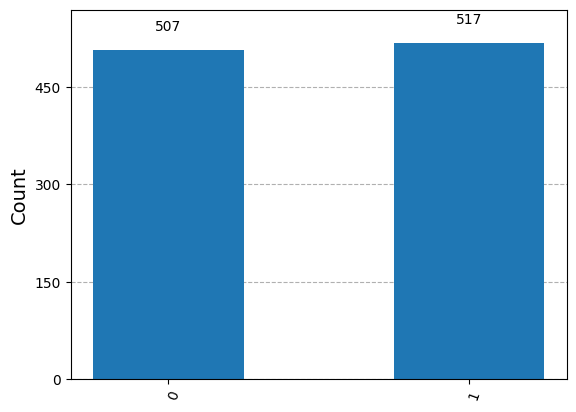

The quantum coin flip result is: tails
Sorry, you guessed wrong. Better luck next time!


In [1]:
# Install necessary packages
!pip install qiskit qiskit-aer matplotlib --quiet

# Import the required modules
%matplotlib inline
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer
from IPython.display import display

def quantum_coin_flip():
    # Initialize the quantum circuit with 1 qubit and 1 classical bit
    qc = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to put the qubit in a superposition state
    qc.h(0)

    # Measure the qubit
    qc.measure(0, 0)

    # Simulate the quantum circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()

    # Get the measurement result
    counts = result.get_counts(qc)

    # Plot the result
    histogram = plot_histogram(counts)
    display(histogram)
    plt.show()

    # Determine outcome
    outcome = '0' if counts.get('0', 0) > counts.get('1', 0) else '1'

    return outcome

def main():
    print("Welcome to the Quantum Coin Flip Game!")
    guess = input("Guess the outcome of the coin flip (heads/tails): ").strip().lower()

    if guess not in ['heads', 'tails']:
        print("Invalid guess. Please enter 'heads' or 'tails'.")
        return

    outcome = quantum_coin_flip()

    # Translate the quantum outcome to heads/tails
    outcome_str = 'heads' if outcome == '0' else 'tails'

    print(f"The quantum coin flip result is: {outcome_str}")

    if guess == outcome_str:
        print("Congratulations! You guessed correctly.")
    else:
        print("Sorry, you guessed wrong. Better luck next time!")

if __name__ == "__main__":
    main()
